<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/%EA%B0%9C%EC%B1%84%EB%AA%85_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
from nltk import word_tokenize, pos_tag, ne_chunk

sentence="James is working at Disney in London"
#토큰화 후 품사태깅
tokenized_sentence=pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [22]:
ner_sentence=ne_chunk(tokenized_sentence) #Named Entity Recognition 개체명 인식
print(ner_sentence) #GPE 는 장소

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


In [23]:
#BIO 표현 Begin Inside Outside
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [27]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="train.txt")
f=open('train.txt', 'r')
tagged_sentences=[]
sentence=[]

for line in f:
  if len(line)==0 or line.startswith('-DOCSTART-') or line[0]=='\n':
    if len(sentence)>0:
      tagged_sentences.append(sentence)
      sentence=[]
    continue
  splits=line.split(' ') # 띄어쓰기를 기준으로 나눈다.
  splits[-1]=re.sub(r'\n', '', splits[-1]) #나눠진 문장에서 마지막에 줄바꿈 표시를 삭제한다.
  word=splits[0].lower() #소문자로 모두 바꾼다.
  sentence.append([word, splits[-1]]) #단어와 태깅명만 추가한다.

In [28]:
print("전체 샘플 개수 : ", len(tagged_sentences))

전체 샘플 개수 :  14041


In [29]:
print("첫번째 샘플 : ", tagged_sentences[0])

첫번째 샘플 :  [['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [33]:
sentences, ner_tags=[], []
for tagged_sentence in tagged_sentences:
  sentence, ner_tag=zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(ner_tag))

In [34]:
print("첫번째 샘플의 문장 : ", sentences[0])
print("첫번째 샘플의 레이블 : ", ner_tags[0])

첫번째 샘플의 문장 :  ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
첫번째 샘플의 레이블 :  ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [35]:
print(sentences[12])
print(ner_tags[12])

['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-PER', 'O', 'O', 'O']


샘플의 최대 길이 :  113
샘플의 평균 길이 :  14.501887329962253


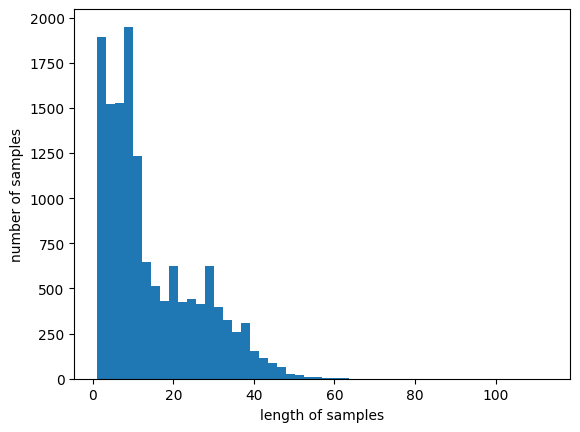

In [37]:
print("샘플의 최대 길이 : ", max(len(l)for l in sentences))
print("샘플의 평균 길이 : ", sum(map(len, sentences))/len(sentences))
plt.hist([len(l)for l in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [52]:
vocab_size=4000
src_tokenizer=Tokenizer(num_words=vocab_size, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer=Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [53]:
tag_size=len(tar_tokenizer.word_index)+1
print("단어 집합의 크기 : ", vocab_size)
print("개체명 태깅 정보 집합의 크기 : ", tag_size)

단어 집합의 크기 :  4000
개체명 태깅 정보 집합의 크기 :  10


In [54]:
#정수 인코딩
X_train=src_tokenizer.texts_to_sequences(sentences)
y_train=tar_tokenizer.texts_to_sequences(ner_tags)

In [55]:
print("첫번째 샘플의 문장 : ", X_train[0])
print("첫번째 샘플의 레이블 : ", y_train[0])

첫번째 샘플의 문장 :  [989, 1, 205, 629, 7, 3939, 216, 1, 3]
첫번째 샘플의 레이블 :  [4, 1, 7, 1, 1, 1, 7, 1, 1]


In [56]:
index_to_word=src_tokenizer.index_word
index_to_tag=tar_tokenizer.index_word

In [57]:
decoded=[]
for index in X_train[0]: #정수 인코딩된 첫번째 문장만 디코딩해본다.
  decoded.append(index_to_word[index])

print("기존 문장 : {}".format(sentences[0]))
print("빈도수가 낮은 단어가 OOV 처리된 문장 : {}".format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [58]:
max_len=70
X_train=pad_sequences(X_train, padding='post', maxlen=max_len)
y_train=pad_sequences(y_train, padding='post', maxlen=max_len)

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.2, random_state=777)

In [60]:
#레이블의 원-핫 인코딩
y_train=to_categorical(y_train, num_classes=tag_size)
y_test=to_categorical(y_test, num_classes=tag_size)

In [61]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam

embedding_dim=128
hidden_units=128

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim,input_length=max_len, mask_zero=True)) #패딩 때문에 값이 0인 것들은 연산에서 제외한다.
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))#다대다 모델이므로 모든 sequences들의 출력이 필요하다.
model.add(TimeDistributed(Dense(tag_size, activation='softmax'))) #다대다 모델일 때 TimeDistributed를 사용하여 모든 시점에 대해 출력층을 사용한다.

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=8)

Epoch 1/8
88/88 [==============================] - 96s 975ms/step - loss: 0.9538 - accuracy: 0.8246 - val_loss: 0.6402 - val_accuracy: 0.8333
Epoch 2/8
88/88 [==============================] - 94s 1s/step - loss: 0.5069 - accuracy: 0.8473 - val_loss: 0.4110 - val_accuracy: 0.8750
Epoch 3/8
88/88 [==============================] - 105s 1s/step - loss: 0.3556 - accuracy: 0.8941 - val_loss: 0.2984 - val_accuracy: 0.9136
Epoch 4/8
88/88 [==============================] - 67s 763ms/step - loss: 0.2515 - accuracy: 0.9276 - val_loss: 0.2202 - val_accuracy: 0.9374
Epoch 5/8
88/88 [==============================] - 66s 755ms/step - loss: 0.1860 - accuracy: 0.9461 - val_loss: 0.1901 - val_accuracy: 0.9468
Epoch 6/8
88/88 [==============================] - 64s 728ms/step - loss: 0.1530 - accuracy: 0.9550 - val_loss: 0.1687 - val_accuracy: 0.9528
Epoch 7/8
88/88 [==============================] - 64s 728ms/step - loss: 0.1302 - accuracy: 0.9611 - val_loss: 0.1616 - val_accuracy: 0.9542
Epoch 8/8
8

In [65]:
print("\n 테스트 정확도 : %.4f"%(model.evaluate(X_test, y_test)[1]))

88/88 [==============================] - 9s 103ms/step - loss: 0.1594 - accuracy: 0.9563

 테스트 정확도 : 0.9563


In [67]:
index=10
y_predicted=model.predict(np.array([X_test[index]]))
#예측 y리턴, argmax 사용을 위해 배열로 변경
y_predicted=np.argmax(y_predicted, axis=-1)
#확률 벡터를 정수 레이블로 변경
labels=np.argmax(y_test[index], -1)
#원-핫 벡터를 정수 인코딩으로 변경

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[index], labels, y_predicted[0]):
  if word!=0:
    print("{:17}: {:7} {}".format(index_to_word[word], index_to_tag[tag].upper(), index_to_tag[pred].upper()))

1/1 [==============================] - 0s 81ms/step
단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  I-MISC
on               : O       O
monday           : O       O
night            : O       O
to       